In [727]:
import csv
import numpy as np
from matplotlib import pyplot
from sklearn import linear_model
from sklearn.model_selection import cross_validate
import pandas as pd
import datetime as dt
import math

In [728]:
#Sort the data in the file
#read a file
file = open('Fukadani201607to10row.txt')
# file = open('Fukadani2016JuneJulyselected.txt')

Allfile = file.readlines()
file.close()
Allfilelisted = [0]*len(Allfile)

#split each list at blanks
for n in range(len(Allfile)):
    Allfilelisted[n] = Allfile[n].split()

#extract title
Data = Allfilelisted[1:]
Datatitle = Allfilelisted[0]


#date and time are located in different places so put them together
#datetime = date + time (datetime doesn't have a title)

datetime = [0]*(len(Data))
for n in range(len(Data)):
    datetime[n] = Data[n][0] + Data[n][1]
    
# #Delite date+time from Data  because "datetime" is not numbers 

Data1 = [0]*(len(Data))
for n in range(len(Data)):
    Data1[n] = Data[n][2:]

Data1title = Allfilelisted[0][1:]
print(Data1title)

['RECORD', 'Bat_Avg', 'Pit_WL_Avg', 'L_UR_Avg', 'L_UL_Avg', 'L_DR_Avg', 'L_DL_Avg', 'Load_Avg', 'Load_Avg_difference', 'WL_up_Avg', 'WL_cha_Avg', 'turb1000_Avg', 'turb4000_Avg', 'DiffVolt_Avg', 'hp_Tot(1)', 'hp_Tot(2)', 'hp_Tot(3)', 'hp_Tot(4)', 'hp_Tot(5)', 'hp_Tot(6)', 'vel_P_Tot', 'WL_FMR_Avg', 'hp_Tot(7)', 'hp_Tot(8)', 'hp_Tot(9)', 'hp_Tot(10)']


In [729]:
#Start using pandas
#The reason I just started pandas is just because I haven't known about pandas until few minites ago haha

df = pd.DataFrame(Data1)
df.columns = Data1title

#Choose data we are gonna use
#YOU SHOULD CHANGE HERE IF YOU WANNA SELECT DIFFERENT INPUT DATA OR ADD SOME DATA AS INPUTS
# y_cols = ['Load_Avg_difference']
y_cols = ['Load_Avg_difference']
# X_cols = ['WL_FMR_Avg', 'hp_Tot(3)']
# X_cols = ['Pit_WL_Avg', 'WL_up_Avg', 'WL_cha_Avg', 'turb1000_Avg', 'turb4000_Avg', 'DiffVolt_Avg', 'hp_Tot(1)', 'hp_Tot(2)', 'hp_Tot(3)', 'hp_Tot(4)', 'hp_Tot(5)', 'hp_Tot(6)', 'vel_P_Tot', 'WL_FMR_Avg',
# 'hp_Tot(7)', 'hp_Tot(8)', 'hp_Tot(9)', 'hp_Tot(10)']
# X_cols = ['Bat_Avg', 'WL_up_Avg', 'WL_cha_Avg', 'turb1000_Avg', 'turb4000_Avg', 'DiffVolt_Avg', 'hp_Tot(1)', 'hp_Tot(2)', 'hp_Tot(3)', 'hp_Tot(4)', 'hp_Tot(5)', 'hp_Tot(6)', 'vel_P_Tot', 'WL_FMR_Avg',
# 'hp_Tot(7)', 'hp_Tot(8)', 'hp_Tot(9)', 'hp_Tot(10)']
X_cols = ['WL_FMR_Avg','vel_P_Tot','hp_Tot(6)','hp_Tot(5)']
# X_cols = ['hp_Tot(6)']
# X_cols = [ 'hp_Tot(2)', 'hp_Tot(3)', 'hp_Tot(4)', 'hp_Tot(5)', 'hp_Tot(6)',  'WL_FMR_Avg','hp_Tot(7)', 'hp_Tot(8)', 'hp_Tot(9)', 'hp_Tot(10)']
# X_cols = [ 'hp_Tot(5)', 'hp_Tot(6)', 'vel_P_Tot', 'WL_FMR_Avg','hp_Tot(7)']


X = df[X_cols].values.astype('float')
y = df[y_cols].values.astype('float')
# #     X.rolling(window=5).mean()
#     y.rolling(window=5).mean()



In [730]:
# moving averages
df_copy = pd.DataFrame(Data1)
df_copy.columns = Data1title
mavgs = 5

df[X_cols] = df_copy[X_cols].rolling(window=mavgs).mean()
df[y_cols] = df_copy[y_cols].rolling(window=mavgs).mean()
# print(df[X_cols])
# print(df[y_cols])


In [731]:
#Delete data of when the pit gets cleared 
df["RECORD"] = df["RECORD"].values.astype('float')
indic = []
for i in range(len(df)):
    if df["RECORD"][i] == 0:
        indic.append(i)
# print(indic)
indic.reverse()
print(indic)
df_new = df
for i in range(len(indic)):
    r =  range(indic[i]-101, indic[i]-1)
#     print(indic[i]-101)
#     print(indic[i]-1)
    df_new = df_new.drop(r)

[95900, 84792, 47813, 2225]


In [732]:
#Cut data where pit weigh < 1000?500?
df_new['Load_Avg'] = df_new['Load_Avg'].values.astype('float')
df_cut1 = df_new[(df_new['Load_Avg'] > 200)&(df_new['Load_Avg'] < 1300)]

# Cut data where pit load difference is out of margin of error
df_cut2 = df_cut1[(df_cut1['Load_Avg_difference'] < 20)&(df_cut1['Load_Avg_difference'] > -5)]

#Cut out NaN data
df_final = df_cut2.dropna(how='any')

In [733]:
X = df_final[X_cols].values.astype('float')
y = df_final[y_cols].values.astype('float')

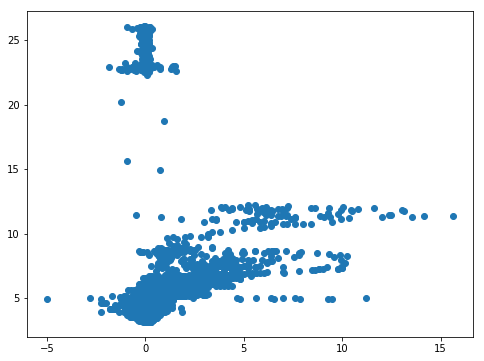

In [734]:
#Take a look at the graph between y and X

import matplotlib.pyplot as plt
# Notebook出力には次の１行が必要
%matplotlib inline

# # Plot the data you select
plt.figure(figsize=(8, 6))

plt.scatter(y, X[:,0])

# plt.figure(figsize=(8, 6))    # グラフのサイズ指定（この行は省略可）
# # Plot all the data
# for i in range(X.shape[1]): 
#     plt.scatter(y, X[:,i])


In [735]:
#Devide data into Training set and test set
#In Machine Learning course of coursera, I learned that I have to devide the data set into Training set, Cross calidation set,Test set.
#But in this case I'll just follow the code that I found online. Probably I'll have to fix this part once I get to know much more about Machine Learning.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=42)


In [736]:
# data normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [737]:
# train the parameters with regression model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train.ravel())

C:\Users\yutak\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [738]:
#Score

print(model.score(X_test,y_test))

0.8192939929440716


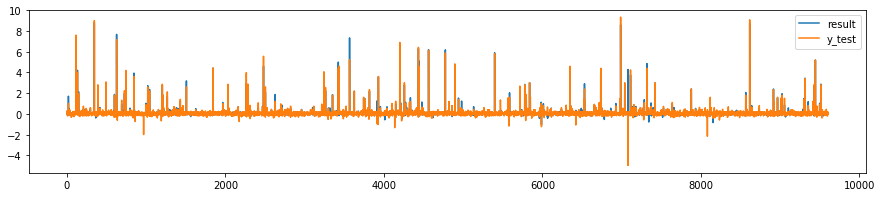

In [739]:
# Results
result = model.predict(X_test)
#flatten y_test to applay the data to a graph
y_test_graph = y_test.flatten()
#
df_result = pd.DataFrame({"y_test":y_test_graph,"result":result})

#
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Draw graph
df_result.plot(figsize=(15, 3))

In [740]:
# df_result[6960:7300].plot(figsize=(15, 3))

1   hp_Tot(6)   0.5023965823432607
2   hp_Tot(7)   0.20749077616440986
3   hp_Tot(5)   0.136744916520008
4   WL_FMR_Avg   0.07694987162653513
5   vel_P_Tot   0.07641785334578635


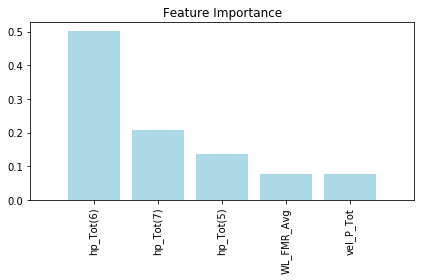

In [741]:
#
feature = model.feature_importances_

#特徴量の重要度を上から順に出力する
f = pd.DataFrame({'number': range(0, len(feature)),
             'feature': feature[:]})
f2 = f.sort_values('feature',ascending=False)
f3 = f2.loc[:, 'number']

#Name of the features
dfX = pd.DataFrame(X)
dfX.columns = X_cols
label = dfX.columns[0:]

#arrange the features in order of importance
indices = np.argsort(feature)[::-1]

for i in range(len(feature)):
    print( str(i + 1) + "   " + str(label[indices[i]]) + "   " + str(feature[indices[i]]))

          
import matplotlib
import matplotlib.pyplot as plt
plt.title('Feature Importance')
plt.bar(range(len(feature)),feature[indices], color='lightblue', align='center')
plt.xticks(range(len(feature)), label[indices], rotation=90)
plt.xlim([-1, len(feature)])
plt.tight_layout()
plt.show()